In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as stats
import scipy.stats as stats
import numpy as np

### Exercise 1

**Scenario**: FashionFiesta is an online clothing store that sells apparel for men, women, and children. They recently made changes to their website's layout in an attempt to increase the average purchase amount. They conducted an A/B test where half of their visitors saw the old layout (Group A) and the other half saw the new layout (Group B).

**Null hypothesis**: The new layout does not improve the average purchase amount vs the old layout

**Alternative Hypothesis**: The new layout has a higher average purchase amount than the old layout

### Exercise 2

**Scenario**: :
Previously, FashionFiesta offered direct discounts to its customers. However, this year, they've changed their voucher mechanism to a ladder voucher system to potentially boost sales. A ladder voucher system means that as customers spend more, they earn incrementally higher discounts. For instance, spend 50 dollars, earn a 5% discount, spend 100 dollars and get a 10% discount, and so on. The goal is to incentivize higher spending. Before introducing the ladder voucher, the average number of items per transaction was 3.

**Null hypothesis**: The ladder voucher does not chnage the number of items per transaction (3)

**Alternative Hypothesis**: The ladder voucher average number of items per transaction is not 3


### Exercise 3

**Scenario**: FashionFiesta has redesigned its checkout page to simplify the process and reduce the number of steps. The company aims to reduce the cart abandonment rate with this new design. Before the redesign, the cart abandonment rate was 20%.

**Null hypothesis**: The new checkout page design does not improve the abandonment rate

**Alternative Hypothesis**: The new checkout page design has a lower abandonment rate than the old design (20%)

In [22]:
# Function to interpret the p-value
def interpret_p_value(p_value, alpha=0.05):
    """
    Interprets the significance of a given p-value.

    Parameters:
    - p_value (float): The p-value to interpret.
    - alpha (float): The significance level, default is 0.05.

    Returns:
    - str: Interpretation of the p-value.
    """

    if p_value < alpha:
        return f"The p-value is {p_value:.3f}. This is less than the significance level of {alpha}. Therefore, we reject the null hypothesis."
    else:
        return f"The p-value is {p_value:.3f}. This is greater than or equal to the significance level of {alpha}. Therefore, we fail to reject the null hypothesis."

# Example usage:
p_val = 0.03
print(interpret_p_value(p_val))


The p-value is 0.030. This is less than the significance level of 0.05. Therefore, we reject the null hypothesis.


In [23]:
urban_trend = [45, 50, 48, 52, 49, 47, 50, 51, 46, 49, 52, 50, 49, 48, 47, 51, 50, 49, 52, 48, 47, 46, 49, 50, 48, 51, 52, 49, 47, 50]
classic_elegance = [40, 42, 43, 41, 44, 42, 45, 43, 44, 42, 41, 40, 43, 44, 42, 41, 43, 44, 42, 45, 44, 41, 43, 44, 45, 43, 42, 44, 43, 41]

In [24]:
# Creating a DataFrame
data = pd.DataFrame({'Urban Trend': urban_trend,
                     'Classic Elegance': classic_elegance})

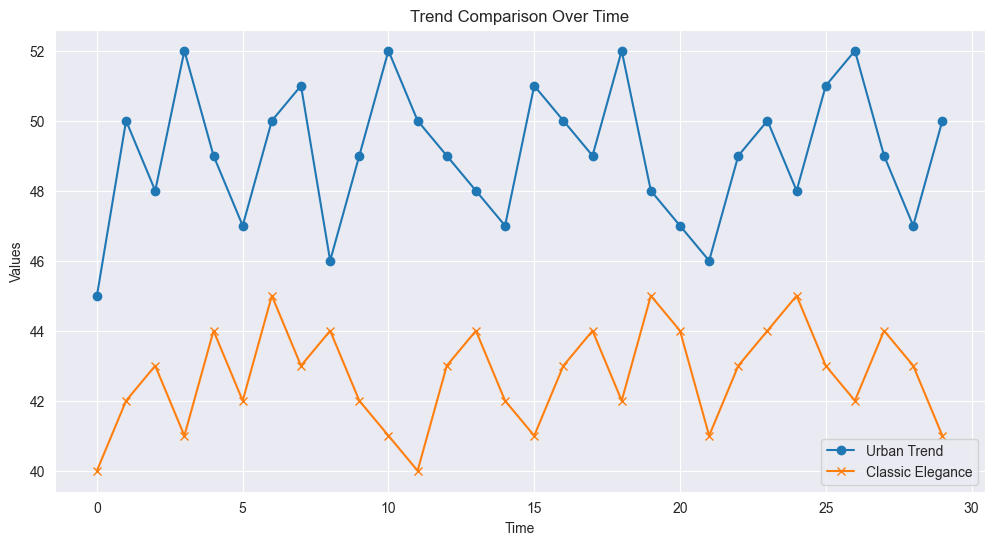

In [25]:
# Line plot for trends over time
plt.figure(figsize=(12, 6))
plt.plot(data['Urban Trend'], label='Urban Trend', marker='o')
plt.plot(data['Classic Elegance'], label='Classic Elegance', marker='x')
plt.title('Trend Comparison Over Time')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

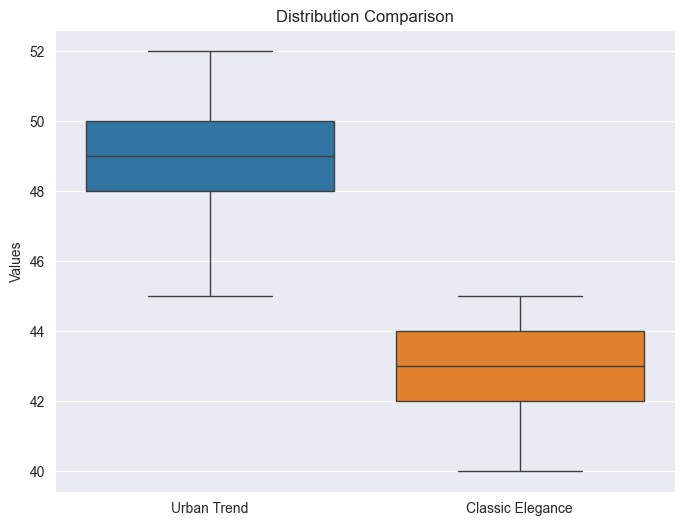

In [26]:
# Box plot for distribution comparison
plt.figure(figsize=(8, 6))
sns.boxplot(data=data)
plt.title('Distribution Comparison')
plt.ylabel('Values')
plt.show()

<Figure size 1200x600 with 0 Axes>

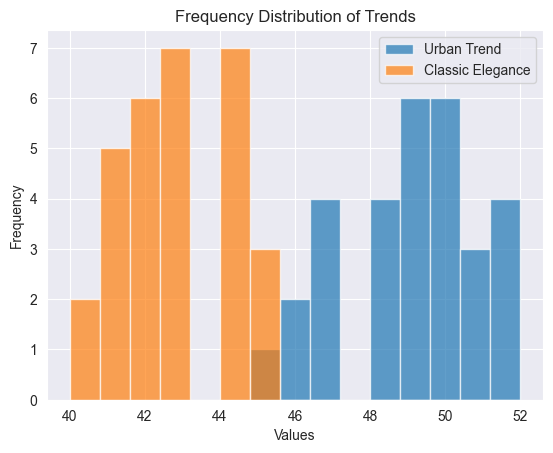

In [27]:
# Histogram for frequency distribution
plt.figure(figsize=(12, 6))
data.plot(kind='hist', alpha=0.7, bins=15)
plt.title('Frequency Distribution of Trends')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Levene's test

**Null hypothesis**: There is no difference in the variances in both

In [28]:
# Perform Levene's Test to assess if the variances of 'urban_trend' and 'classic_elegance' are equal
levene_stat, levene_p = stats.levene(urban_trend, classic_elegance)

# Print the p-value of Levene's Test
print(f"Levene's Test p-value: {levene_p:.4f}")

Levene's Test p-value: 0.1667


In [29]:
# Apply the function to interpret the p-value with a significance level of 0.05
print(interpret_p_value(levene_p, alpha=0.05))

The p-value is 0.167. This is greater than or equal to the significance level of 0.05. Therefore, we fail to reject the null hypothesis.


**Null Hypothesis (H0)**: The average sales (in units) of the "Urban Trend" line is equal to the average sales of the "Classic Elegance" line over a month.

**Alternative Hypothesis (H1)**: The average sales (in units) of the "Urban Trend" line is not equal to the average sales of the "Classic Elegance" line over a month.

In [33]:
# 2-sample t-test
# Perform a 2-sample t-test to compare the means of 'urban_trend' and 'classic_elegance'
t_stat, t_p = stats.ttest_ind(urban_trend,
                              classic_elegance,
                              alternative='two-sided',
                              equal_var=True)  # False - indicates that we are not assuming equal variances

# Print the p-value of the 2-sample t-test
print(f"2-sample t-test p-value: {t_p:.3f}")

# Apply the function to interpret the p-value with a significance level of 0.05
print(interpret_p_value(t_p, alpha=0.05))

2-sample t-test p-value: 0.000
The p-value is 0.000. This is less than the significance level of 0.05. Therefore, we reject the null hypothesis.


# One-Tailed Test

FashionFiesta has decided to implement a new marketing strategy exclusively for its "Urban Trend" footwear line. The strategy involves targeted online ads and influencer partnerships. They hope this will increase the average daily sales of the "Urban Trend" line compared to the "Classic Elegance" line. Before the new marketing strategy, both lines had roughly similar daily sales.

**Null Hypothesis (H0)**: The average daily sales of the "Urban Trend" line (after the new marketing strategy) are less than or equal to the average daily sales of the "Classic Elegance" line.

**Alternative Hypothesis (H1)**: The average daily sales of the "Urban Trend" line (after the new marketing strategy) are greater than the average daily sales of the "Classic Elegance" line.

In [34]:
# Average sales for each line of footwear after new marketing strategy
urban_trend_sales = [55, 56, 60, 59, 54, 58, 57, 59, 56, 55, 58, 59, 60, 57, 56, 60, 59, 58, 57, 60, 59, 58, 56, 57, 60, 59, 56, 57, 60, 59]
classic_elegance_sales = [50, 49, 52, 51, 50, 49, 50, 52, 49, 50, 52, 51, 50, 50, 49, 52, 51, 50, 50, 52, 51, 50, 49, 50, 52, 51, 50, 50, 52, 51]

In [35]:
# Calculate the mean daily sales
mean_urban_trend = np.mean(urban_trend_sales)
mean_classic_elegance = np.mean(classic_elegance_sales)

print(f"Mean daily sales of Urban Trend: {mean_urban_trend:.2f}")
print(f"Mean daily sales of Classic Elegance: {mean_classic_elegance:.2f}")

Mean daily sales of Urban Trend: 57.80
Mean daily sales of Classic Elegance: 50.50


In [36]:
# One-tailed two-sample t-test
# Perform a one-tailed t-test to determine if the mean sales of 'Urban Trend' is significantly greater than 'Classic Elegance'
t_stat, t_p = stats.ttest_ind(urban_trend_sales,
                              classic_elegance_sales,
                              alternative='greater')

# Print the p-value of the one-tailed t-test
print(f"Two-sample t-test p-value (one-tailed): {t_p:.4f}")

Two-sample t-test p-value (one-tailed): 0.0000


In [37]:
# Apply the function to interpret the p-value with a significance level of 0.05
print(interpret_p_value(t_p, alpha=0.05))

The p-value is 0.000. This is less than the significance level of 0.05. Therefore, we reject the null hypothesis.


# Chi-square test

FashionFiesta conducted a survey asking customers about their preferred style of footwear from two new lines: "Urban Trend" and "Classic Elegance". They also asked customers about their age group: "Young (18-30)" or "Mature (31-50)". The company wants to determine if there's a relationship between age group and style preference.

**Null Hypothesis (H0)**: Age group and style preference are independent of each other.

**Alternative Hypothesis (H1)**: Age group and style preference are not independent of each other.

In [39]:
# Define observed frequencies for each category
# 'Urban Trend' and 'Classic Elegance' are the columns
# 'Young (18-30)' and 'Mature (31-50)' are the row index labels
data = {'Urban Trend': [120, 70], 'Classic Elegance': [80, 130]}
index_labels = ['Young (18-30)', 'Mature (31-50)']

# Create a DataFrame
df = pd.DataFrame(data, index=index_labels)
df.head()

,Urban Trend,Classic Elegance
Young (18-30),120,80
Mature (31-50),70,130


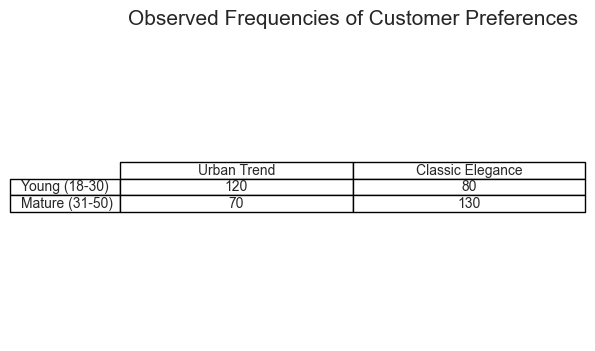

In [40]:
# Plotting the table
fig, ax = plt.subplots(figsize=(6, 4)) # set the size that you'd like (width, height)
ax.axis('off') # Turn off the axis

# Create a table and add it to the plot
tbl = ax.table(cellText=df.values,
               colLabels=df.columns,
               rowLabels=df.index,
               loc='center',
               cellLoc = 'center')

plt.title("Observed Frequencies of Customer Preferences", fontsize=15)
plt.show()

In [42]:
# Chi-square test
chi2_stat, p_val, _, expected_frequencies = stats.chi2_contingency(df.values)

# Print the p-value from the chi-square test
print(f"p-value: {p_val:.4f}")

# Print the expected frequencies calculated by the chi-square test
print(f"Expected Frequencies:\n{expected_frequencies}")

p-value: 0.0000
Expected Frequencies:
[[ 95. 105.]
 [ 95. 105.]]


In [43]:
# Apply the function to interpret the p-value with a significance level of 0.05
print(interpret_p_value(p_val, alpha=0.05))

The p-value is 0.000. This is less than the significance level of 0.05. Therefore, we reject the null hypothesis.
